In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py

# Settings 

The attenuator is at $36 dB$.

In [ ]:
def load_waveforms(filename, channel):
    with h5py.File(filename, 'r') as f:
        waveforms = f[f'CH{channel}']
        waveforms = [waveforms[str(i)] for i, _ in enumerate(waveforms)]
        waveforms = [pd.DataFrame(w, columns=['t', 'V']) for w in waveforms]
        first_80_ns = lambda w: w[w['t'] < 80e-9]

        # for w in waveforms:
        #     w = w - first_80_ns(w).mean()

        # trigger_in_mV = 2
        # for w in waveforms:
        #     if w['V'].max() - w['V'].min() < trigger_in_mV * 1e-3:
        #         w['V'] = np.zeros_like(w['V'])
        return waveforms
FILENAME1 = r'data\single_photon_res\pmt1\signals_20250325-203247.h5'
wavs_ch1 = load_waveforms(FILENAME1, 1)
wavs_ch2 = load_waveforms(FILENAME1, 2)

C:\Users\tobif\AppData\Local\Temp\ipykernel_1664\1271536461.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
C:\Users\tobif\AppData\Local\Temp\ipykernel_1664\1271536461.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))
C:\Users\tobif\AppData\Local\Temp\ipykernel_1664\1271536461.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(np.round(a.get_xticks() * 1e9))
C:\Users\tobif\AppData\Local\Temp\ipykernel_1664\1271536461.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(np.round(a.get_yticks() * 1e3))


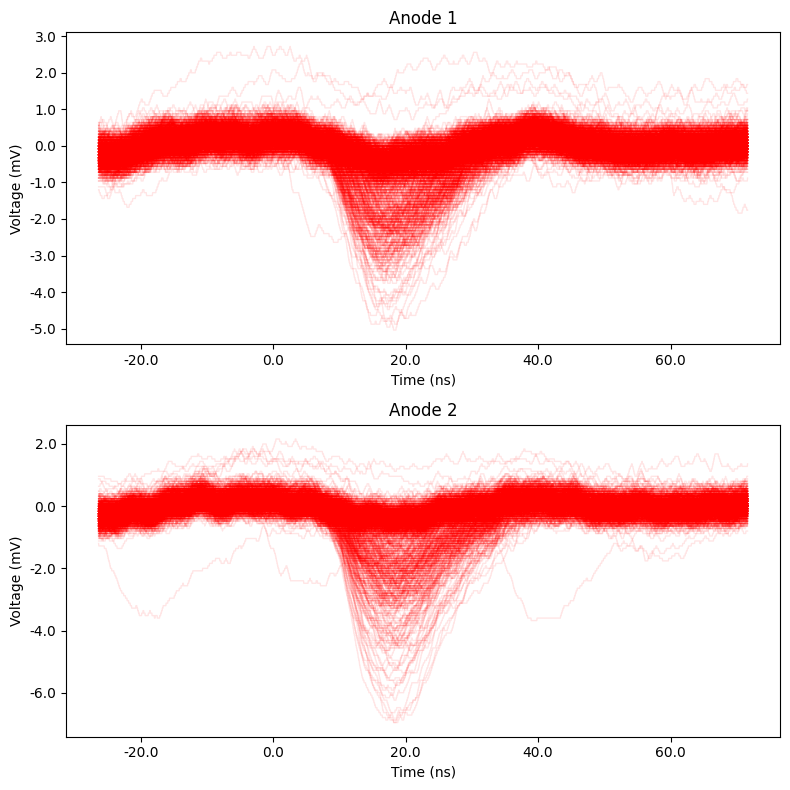

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (8, 8))
ax[0].set_title('Anode 1')
for w in wavs_ch1:
    if w['V'].max() ==0 and w['V'].min() == 0:
        continue
    ax[0].plot(w['t'], w['V'], color = 'red', alpha = 0.1, linewidth = 1.)
ax[1].set_title('Anode 2')
for w in wavs_ch2:
    if w['V'].max() ==0 and w['V'].min() == 0:
        continue
    ax[1].plot(w['t'], w['V'], color = 'red', alpha = 0.1, linewidth = 1.)

# multiply x ticks by 1000 to rescale to ns

for a in ax:
    a.set_xticklabels(np.round(a.get_xticks() * 1e9))
    a.set_xlabel('Time (ns)')
    a.set_yticklabels(np.round(a.get_yticks() * 1e3))
    a.set_ylabel('Voltage (mV)')
plt.tight_layout()
plt.savefig('plots/single_photon_res/pmt2/single_photon_signals_ch1.png', dpi=200)
plt.show()

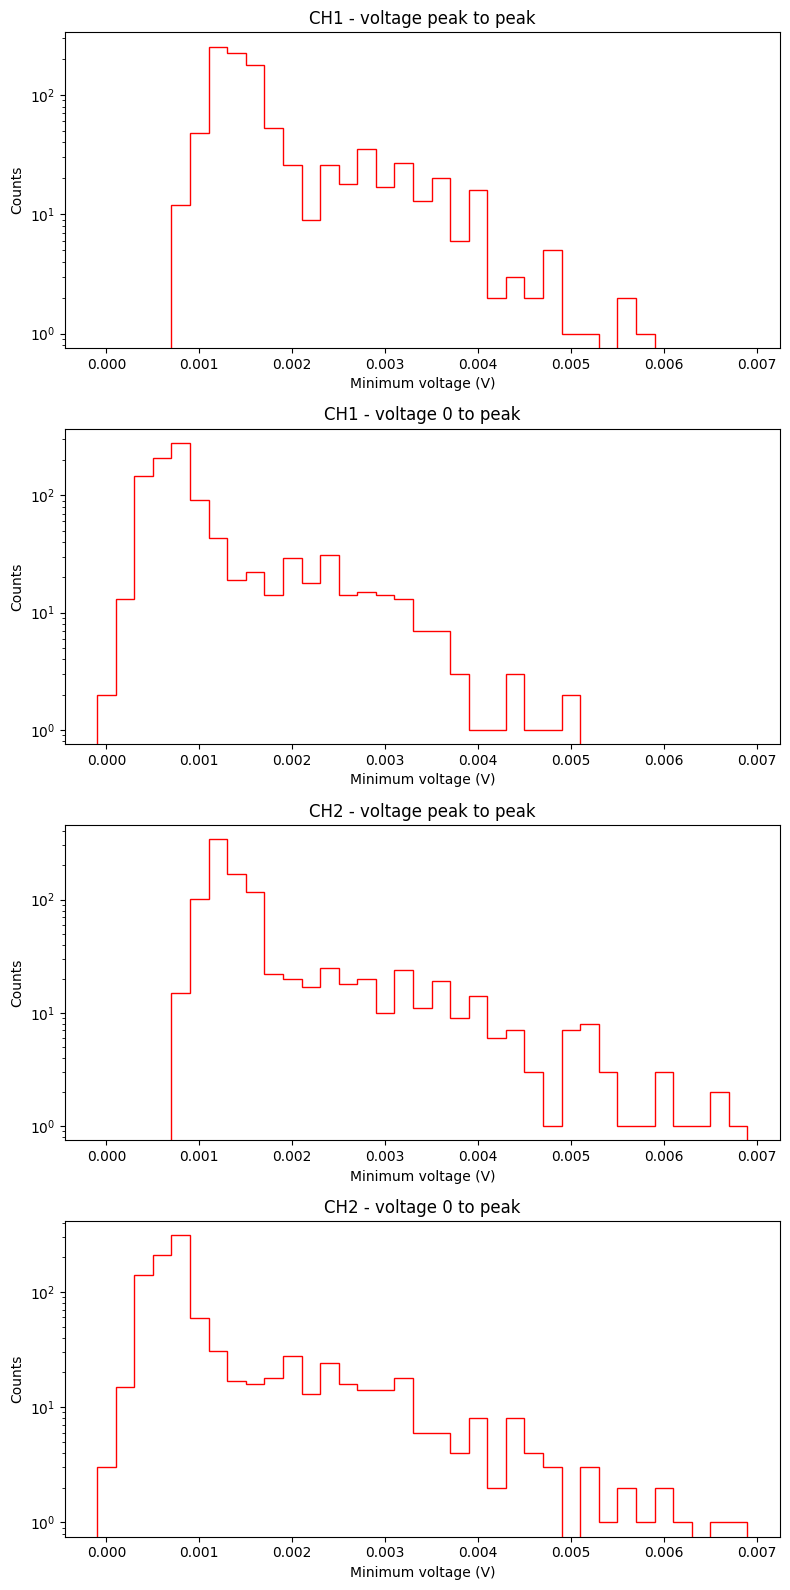

In [157]:

vmins = np.array([w['V'].min() for w in wavs_ch1])
vmins *=-1
vp2ps = [w['V'].max() - w['V'].min() for w in wavs_ch1]

fig, ax = plt.subplots(4,1,figsize = (8, 16))

min = 0e-3
max = 7e-3
step = 2e-4
bins = np.arange(min - step/2, max+step/2, step)
ax[0].hist(vp2ps, range=(min, max), bins=bins, histtype='step', color='red')
ax[0].set_title('CH1 - voltage peak to peak')
ax[1].hist(vmins, range=(min, max), bins=bins, histtype='step', color='red')
ax[1].set_title('CH1 - voltage 0 to peak')

vp2ps = [w['V'].max() - w['V'].min() for w in wavs_ch2]
vmins = np.array([w['V'].min() for w in wavs_ch2])
vmins *= -1

ax[2].hist(vp2ps, range=(min, max), bins=bins, histtype='step', color='red')
ax[2].set_title('CH2 - voltage peak to peak')
ax[3].hist(vmins, range=(min, max), bins=bins, histtype='step', color='red')
ax[3].set_title('CH2 - voltage 0 to peak')


for a in ax:
    a.set_xlabel('Minimum voltage (V)')
    a.set_ylabel('Counts')
    a.set_yscale('log')
plt.tight_layout()
plt.show()